# SNES verification

Each test problem is a critical assembly and should have $k_\mathrm{eff} = 1$.

Each problem is run using a diamond-difference code version (yellow circles) and a linear-discontinuous finite-element version (blue diamonds). 

In [128]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [129]:
%%bash --out keffs
grep 'K[ ]EFF' qa/*.outs | tr -s ' ' | cut -d' ' -f4  # Read the diamond-difference results

In [130]:
%%bash --out keffl
grep 'K[ ]EFF' qa/*.outl | tr -s ' ' | cut -d' ' -f4  # Read the linear-discontinuous results

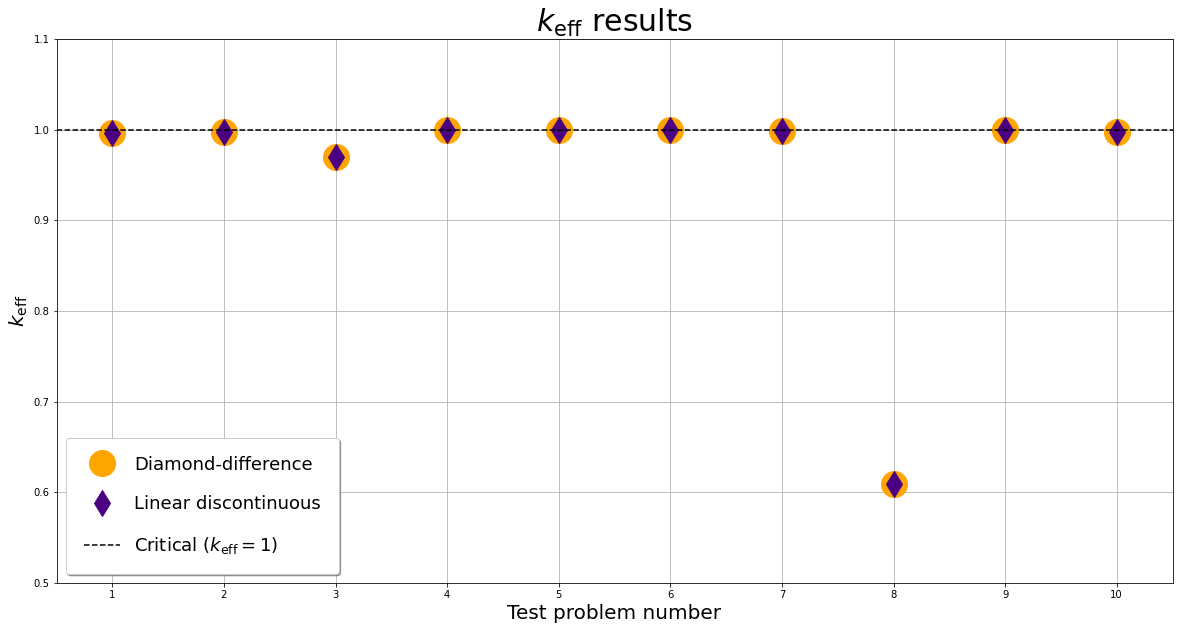

In [154]:
snes = [float(s) for s in keffs.split()]
snel = [float(s) for s in keffl.split()]
n = len(snes)
x = range(1, n+1)
xc = [x for x in range(n+2)] # Critical curve
yc = [1 for i in xw]         # Critical curve
plt.plot(x, snes, 'o', color='orange', markersize=26, label="Diamond-difference")
plt.plot(x, snel, 'd', color='indigo', markersize=18, label="Linear discontinuous")
plt.plot(xc, yc, 'k--', label="Critical ($k_\mathrm{eff}=1$)")
plt.xlim([0.5, n+0.5])
plt.ylim([0.5, 1.1])
plt.xlabel("Test problem number", fontsize=20)
plt.ylabel("$k_\mathrm{eff}$", fontsize=20)
plt.title("$k_\mathrm{eff}$ results", fontsize=30)
plt.legend(fontsize=18, shadow=True, borderpad=1.0, labelspacing=1.2)
plt.grid()
plt.xticks(x)
plt.show()